<a href="https://colab.research.google.com/github/juangross/cursoPDI2021/blob/main/PDI_TP8_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementar un aplicativo que permita abrir una imagen y con esta obtener:


• Downsampling X2 (mostrando la imagen resultado al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.


• Cuantización a cantidad de niveles de gris variable, utilizando uniforme, dithering aleatorio, y difusión del error por scan-line.
Todas las funciones de Downsamplig, Upsampling y Cuantización deben ser desarrolladas como funciones propias y NO con funciones de biblioteca. Les sugiero recorrer la imagen mediante ciclos for anidados para una fácil implementación.
Fecha de entrega: 08 de Dicembre. 

bloque 1 - descarga de imágenes

In [36]:
#importo material de trabajo
!git clone https://github.com/juangross/cursoPDI2021

fatal: destination path 'cursoPDI2021' already exists and is not an empty directory.


In [54]:
import matplotlib.pyplot as plt
import imageio as img
import numpy as np
from scipy import fftpack
import fnmatch
import os


#transformo a 
def RGB_TO_YIQ(RGBImage ):
  #matriz de conversión de RGB -> YIQ
  RGB2YIQ=np.array([[0.299,0.587,0.114],
                    [0.595716,-0.274453,-0.321263],
                    [0.211456,-0.522591,0.311135]], dtype=float)

  #me baso en esta explicación del producto matricial para hacer la conversión de bases
  #https://stackoverflow.com/questions/46990838/numpy-transforming-rgb-image-to-yiq-color-space
  YIQ_image=np.zeros(RGBImage.shape, dtype=float)
  YIQ_image=np.dot(RGBImage,RGB2YIQ.T.copy())
  return YIQ_image


def leerIMG(archivo):

  #Lee imagen con el formato actual
  imagen=(img.imread(f"{path}{archivo}.{ext}"))      #lee con imageio

  #imagen=imagen.astype('float')/255 #normalizo
  #imagen=np.clip(imagen,0.,1.)  #recorto los valores extremos al rango [0:1] 
  print("leyendo archivo:", f"{path}{archi}.{ext}", imagen.shape)
  #plt.imshow( imagen)

  #print("valor máximo: ",np.max(imagen))
  return  imagen



bloque 3 - cargo imagen.

iamgenes en grayscale= devuelve la imagen


imagen RGB: convierto q YIQ y devuelve sólo el canal Y

leyendo archivo: ./cursoPDI2021/imagenes/plantaciones1.png (412, 506, 3)
Archivo, dimension:  plantaciones1 (412, 506, 3)
valor máximo:  235.126


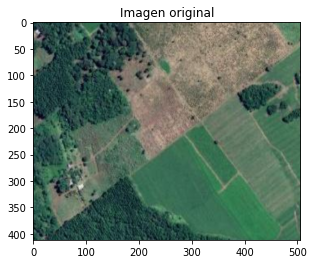

In [55]:
path="./cursoPDI2021/imagenes/"
ext="png"

#Procurar buscar imágenes que tengan el mismo tamaño
archi = "plantaciones1" #@param [ 'Philips_PM5544.svg320','Philips_PM5544.svg640', '320px-RCA_Indian_Head_Test_Pattern.svg320', '640px-RCA_Indian_Head_Test_Pattern.svg','chip1r','chip2','chip3-gray', 'plantaciones1', 'mac_atrofica','mac_subatr']

imagen=leerIMG(archi)

print("Archivo, dimension: ", archi, imagen.shape)

if (len(imagen.shape) >2):
  #la imagen tiene mas de 1 canal.
  #img2=imagen.astype('float')//255 #normalizo
  #img3=np.clip(img2,0.,1.)  #recorto los valores extremos al rango [0:1] 

  imagen_yiq=RGB_TO_YIQ(imagen)
  #print("Canales: ", imagen_yiq.shape)
  img=imagen_yiq[:,:,0]

else:
  #tiene un sólo canal
  img=imagen

print("valor máximo: ",np.max(img))
plt.title("Imagen original")
plt.imshow( imagen.astype('uint8') )



bloque 4 - procesamiento

downscale(imagen):  (412, 506)
Lienzo:  (206, 253)


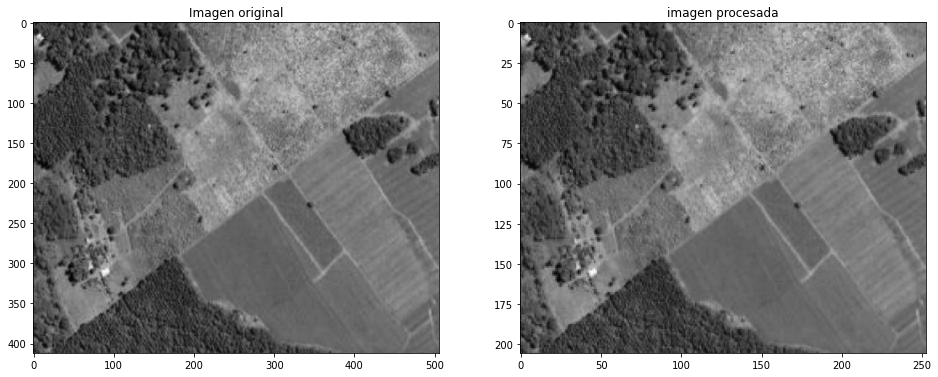

In [56]:
def downscale(img, tipo= "constante"):
  tam= img.shape
  print("downscale(imagen): ", tam)
  
  kernel=0.25* np.array([[1,1],
                    [1,1]])
  kx=kernel.shape[0] #ancho del kernel
  ky=kernel.shape[0] #alto del kernel
  ajustex=tam[0]%2
  ajustey=tam[1]%2
  lienzox=tam[0]//2+ajustex
  lienzoy=tam[1]//2+ajustey
  #print("tamaño lienzo:", (tam[0]//2+ajustex) ,(tam[1]//2+ajustey))
  #defino lienzo en blanco cuyo tamaño es la mitad que el de la imagen.
  lienzo=np.zeros((lienzox,lienzoy),dtype=img.dtype)
  print("Lienzo: ", lienzo.shape)

  if tipo=='constante':
    for i in range(0,lienzox):
      for j in range(0,lienzoy):
#       el escalado es simplemente copiar en el lienzo
#        1 pixel de cada 2 pixels de la imagen original
        lienzo[i,j]=img[i*2,j*2]

  elif tipo=='promedio':
#   hago el reescalado tomando un kernel de 2x2 y calculo el promedio.
#   el valor del promedio es el valor resultado escalado
#promedio entre las 4 muestra
#usando un slice de la imagen
    for i in range(0,lienzox):
      for j in range(0,lienzoy):
        ven= img[i*2:i*2+kx,j*2:j*2+ky]
        lienzo[i,j]=np.mean(ven)
#       calculo manusl
#        lienzo[i,j]=.25*(img[i*2,j*2]+
#                         img[i*2+1,j*2]+
#                         img[i*2,j*2+1]+
#                         img[i*2+1,j*2+1])
  
  #elif tipo=='bicubica':

  return lienzo



op = "downscale" #@param [ 'downscale', 'upscale']
tipo = "constante" #@param [ 'constante', 'lineal', 'bilineal','promedio']


if op== "downscale":  res=downscale(img, tipo)  



fig, axs = plt.subplots(1, 2, tight_layout=False,figsize=(16,16))
axs[0].imshow(img.astype('uint8'),cmap= 'gray')
axs[0].set_title("Imagen original")
axs[1].imshow( res.astype('uint8'),cmap='gray')
axs[1].set_title("imagen procesada")
plt.show()
